# Projekt 
**Welche Prediktoren haben Einfluss bzw. sind signifikant für den Umsatz im Detailhandel ?**

## Hypothesen
- Die Grösse der Filiale hat keinen Einfluss auf den Umsatz
- Je älter der Laden, desto höher der Umsatz, d.h. Alter hat keinen Einfluss auf Umsatz.
- Fett in Produkten haben keinen Einfluss auf den Umsatz.

**Ziel**
- Multiples Regressionsmodell
- Vorhersage Umsatz vom Produkt im bestimmten Geschäft(Groesse)
- Empfehlung geben können, welche Eigenschaften von Produkten und Geschäften eine wichtige Rolle für die Umsatz-,steigerung spielen.

--------------
## Datensätze
--------------
**Prädiktoren (Variablen)**   
***Produkt (UV = Unabhängige Variablen)***
- Item_Identifier: Eindeutige Produkt-ID
- Item_Weight: Gewicht des Produkts
- Item_Fat_Content: Fettgehalt-Kategorie (z. B. Low Fat)
- Item_Visibility: Anteil der gesamten Regal-/Displayfläche im Store, der diesem Produkt zugeordnet ist
- Item_Type: Produktkategorie
- Item_MRP: Maximaler Verkaufspreis (List Price / MRP)

***Filiale/Geschäft (UV)***
- Outlet_Identifier: Eindeutige Filial-ID
- Outlet_Establishment_Year: Gründungsjahr der Filiale
- Outlet_Size: Filialgroesse (Flaeche)
- Outlet_Location_Type: Standorttyp/Stadtklasse (z. B. Tier 1–3)
- Outlet_Type: Filialtyp (z. B. Grocery Store, Supermarket)

**Zielvariable (AV = Abhängige Variable)**  
***Item_Outlet_Sales:***  
Umsatz des Produkts in der jeweiligen Filiale. Dies ist die Zielvariable, die vorhergesagt werden soll.  

------------------
## Datengrundlage
------------------
- Train enhält UV und die AV
- Test enhält nur die UV bzw. Prädiktoren

## Import 

In [124]:
import numpy as np
import pandas as pd
# Daten visualisierung
import seaborn as sns
import matplotlib.pyplot as plt
# für das Model
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
# um die Daten zu skalieren
from sklearn.preprocessing import MinMaxScaler

# Warnungen ignorieren
import warnings
warnings.filterwarnings("ignore")



## Daten laden

In [125]:
df_tr = pd.read_csv('Train.csv')
df_te = pd.read_csv('Test.csv')

In [126]:
df_tr.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## EDA

In [127]:
df_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


- 8523 Zeilen d.h. Werte und 10 Spalten d.h. Prediktoren 

***Item_identifier*** und ***Outlet_Identifier*** spielen keine Rolle in Bezug auf das Model bzw. die AV. Werden im nächsten Schritt entfernt. 
    
**Fehlende Werte**
- Item_Weight und Outlet_Size  
  
**Kategorische Variabeln**
- Item_Fat_Content 
- Item_Type
- Outlet_Size
- Outlet_Location_Type
- Outlet_Type

In [128]:
df_te = df_te.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1)
df_tr = df_tr.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1)

In [129]:
df_te.head(2)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.75,Low Fat,0.007565,Snack Foods,107.8622,1999,Medium,Tier 1,Supermarket Type1
1,8.30,reg,0.038428,Dairy,87.3198,2007,NaN,Tier 2,Supermarket Type1


In [130]:
df_tr.head(2)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228


Beide Spalten wurden erfolgreich entfernt. 

### Fehlende Werte 

Wie zuvor gesehen, weisen ***Item_Weight*** und ***Outlet_Size*** fehlende Werte auf. Aber wie viel in Prozent ? 

In [131]:
(df_tr.isnull().sum()/len(df_tr))*100

Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [132]:
df_tr.apply(lambda x: sum(x.isnull()))

Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Diese werden im Abschnitt Datenbearbeitung behandelt. 

### **Visualisierung der AV und UV**


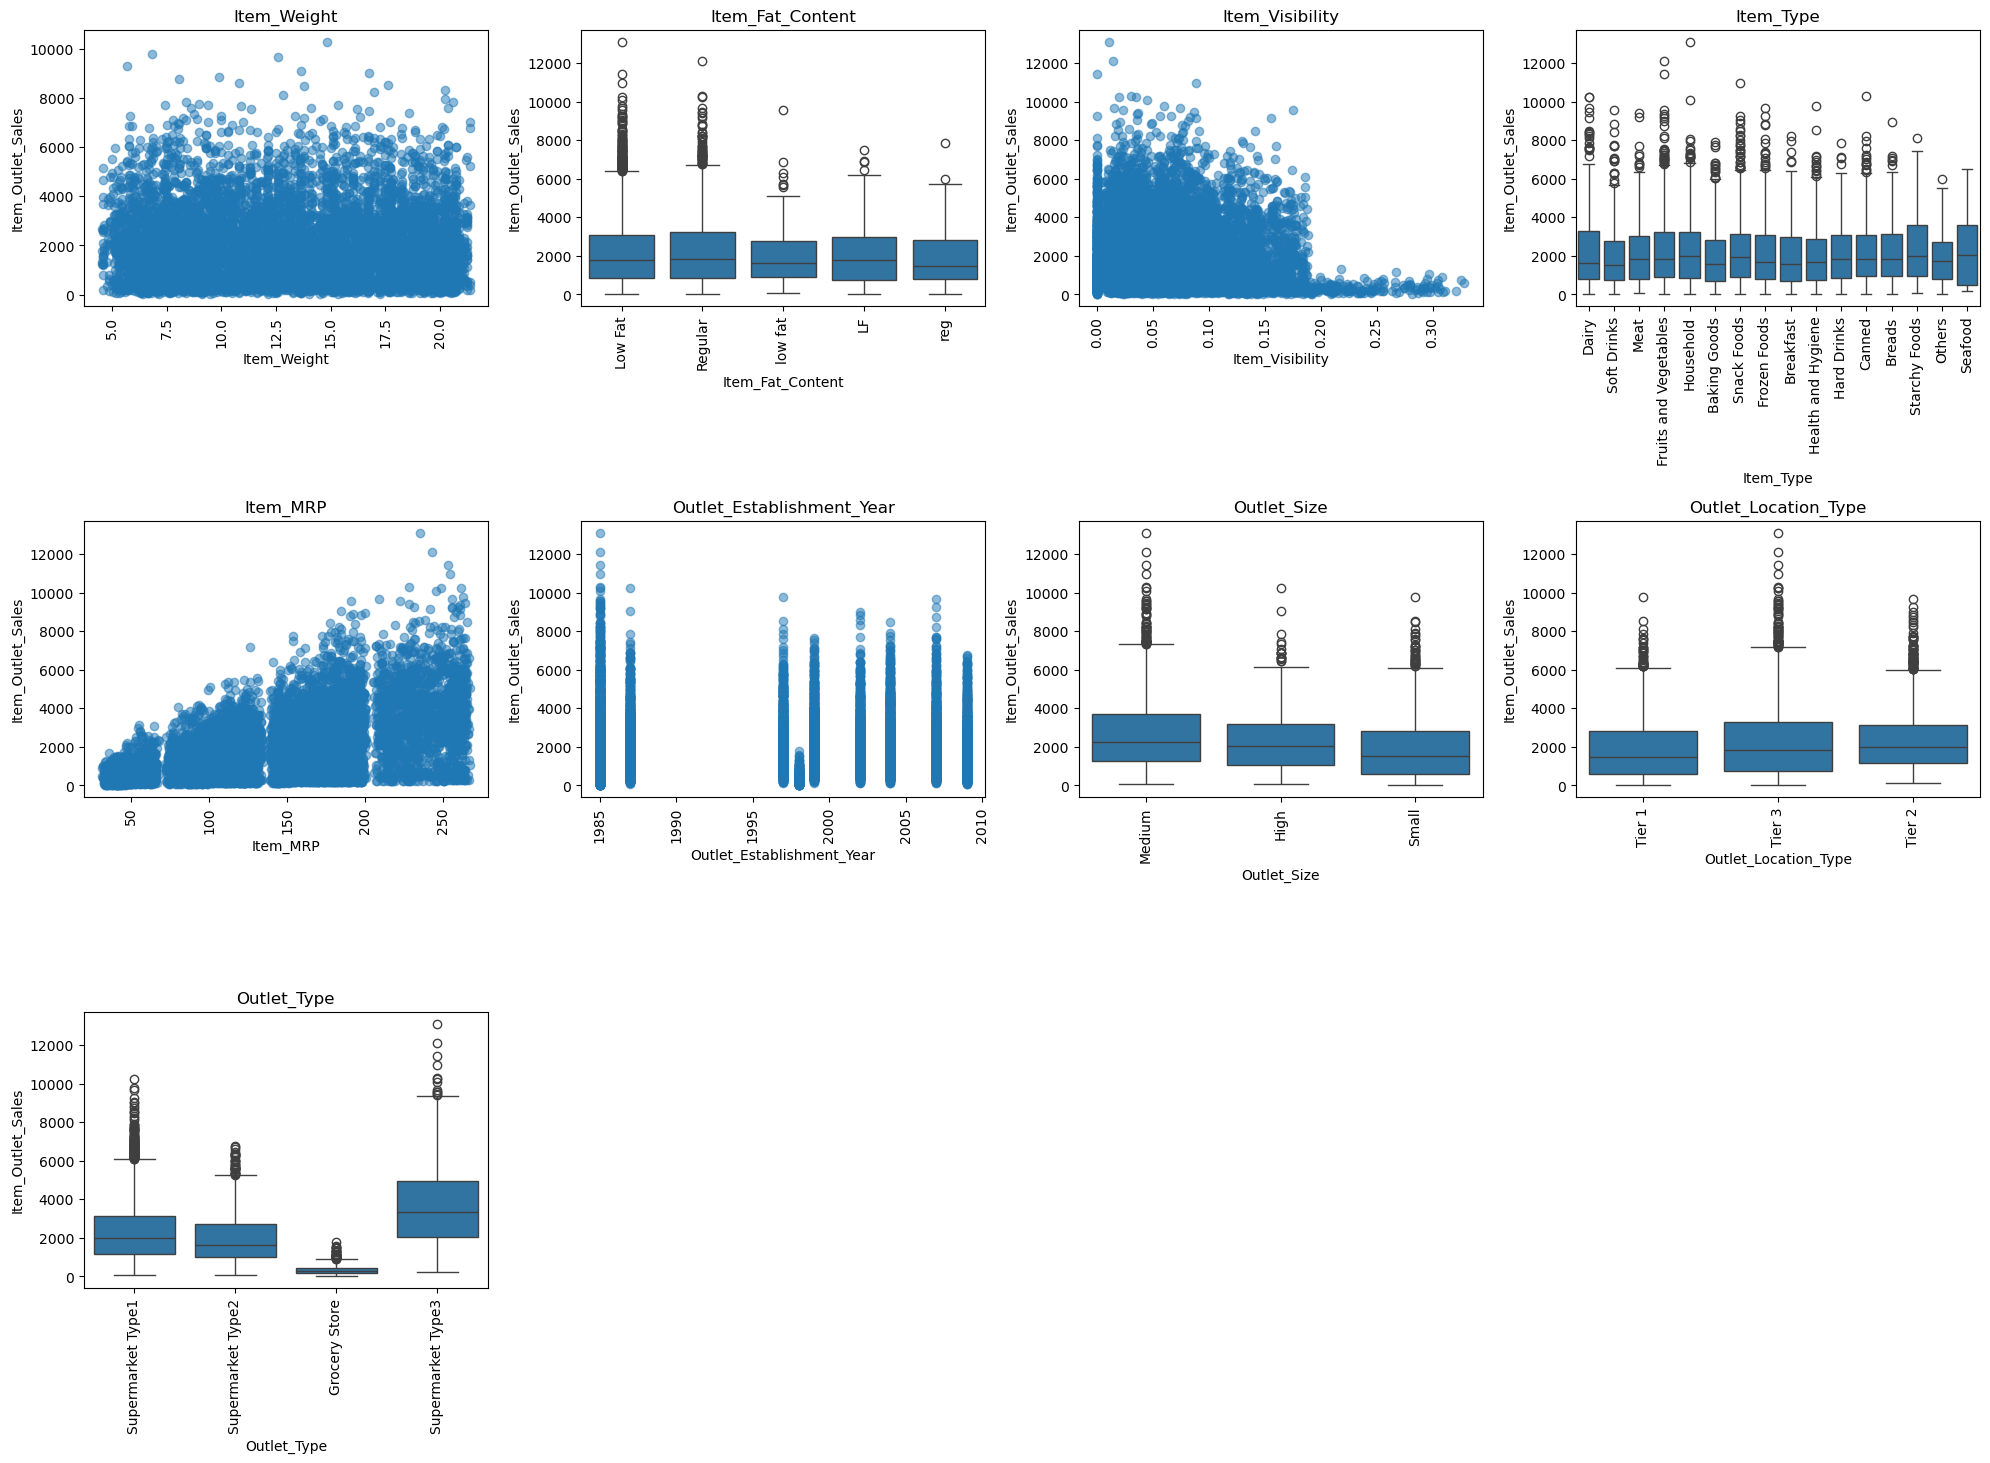

In [133]:
response = 'Item_Outlet_Sales'
covariates = [col for col in df_te.columns if col != response]

fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 18))
axes = axes.flatten()
for i, cov in enumerate(covariates):
    if pd.api.types.is_numeric_dtype(df_tr[cov]):
        axes[i].scatter(df_tr[cov], df_tr[response], alpha=0.5)
    else:
        sns.boxplot(x=df_tr[cov], y=df_tr[response], ax=axes[i])
    axes[i].set_title(cov)
    axes[i].set_xlabel(cov)
    axes[i].set_ylabel(response)
    axes[i].tick_params(axis='x', rotation=90)
for j in range(len(covariates), len(axes)):
    fig.delaxes(axes[j])

fig.tight_layout()
plt.show()

***Item_Fat_Content*** bzw. Prädiktor Fettanteil weisst redundanz bzw. inkonsistenz auf d.h. gleiche Kategorien, aber verschieden eingetragen. Bedarf an Bearbeitung durch zusammenfügen. Dieser ist relevant in Bezug auf die H3: Ob Fettanteil "Einfluss" hat auf Umsatz.  
  
***Outlet_Establishment_Year***  
relevant für H2: Ob Alter des Geschäfts einen "Einfluss" auf Umsatz hat. Benötigt nähere Betrachtung und Umwandlung in Alter d.h. Datum der Daten minus Gründungsjahr = Alter.  



---------
#### **Verteilung der UV Variabeln bzw. Prädiktoren** (Univariate Analyse)
---------

##### **Kategorische Variablen**

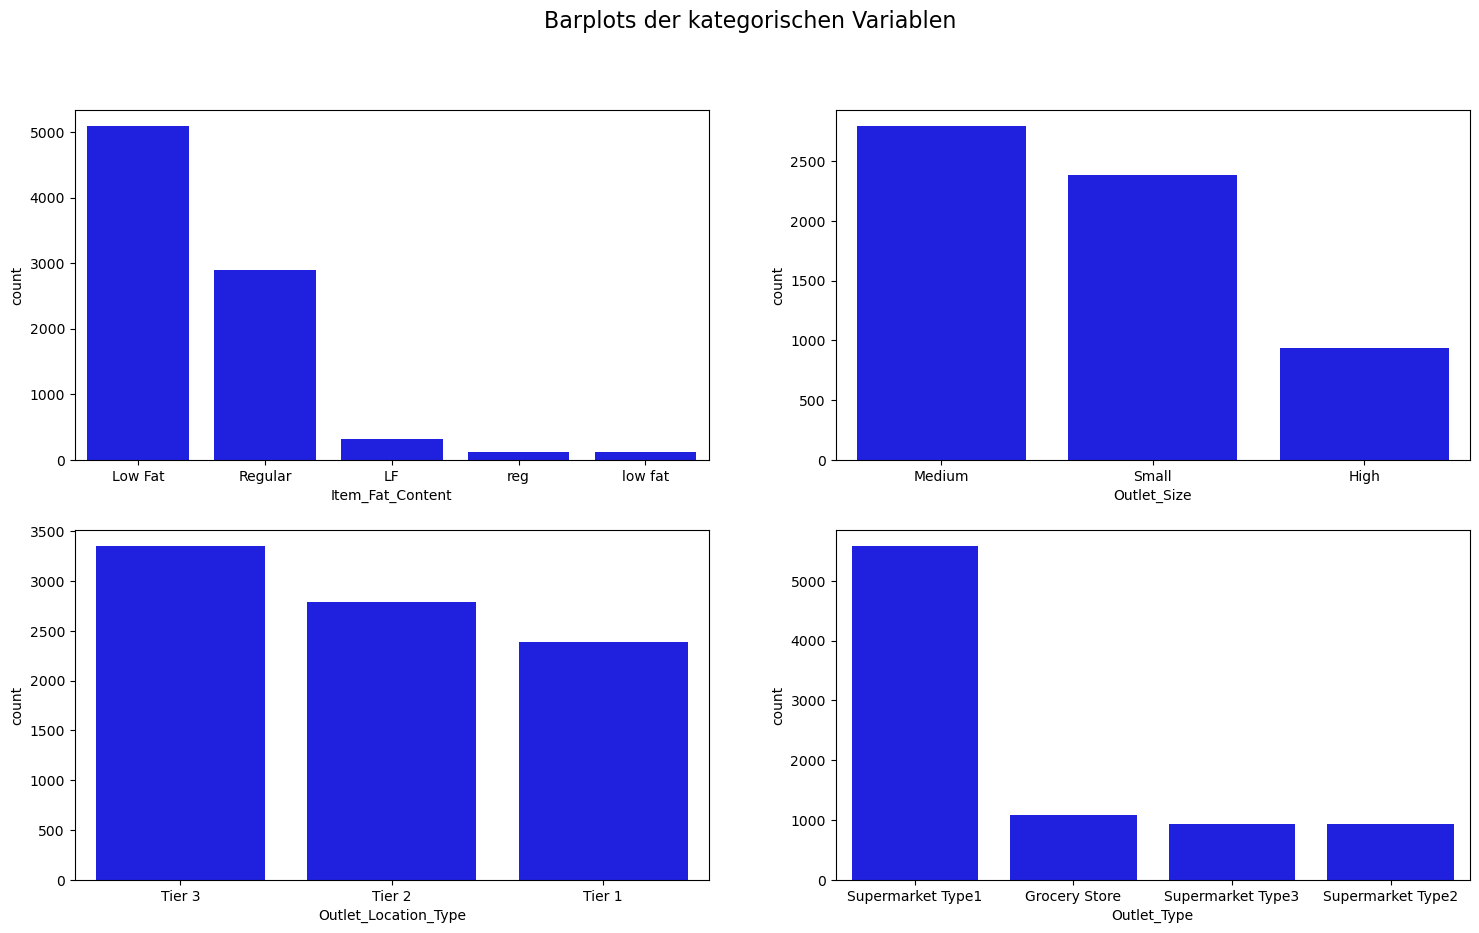

In [134]:
fig, axes = plt.subplots(2, 2, figsize = (18, 10))
  
fig.suptitle('Barplots der kategorischen Variablen', fontsize=16)

sns.countplot(ax = axes[0, 0], x = 'Item_Fat_Content', data = df_tr, color = 'blue', 
              order = df_tr['Item_Fat_Content'].value_counts().index);

sns.countplot(ax = axes[0, 1], x = 'Outlet_Size', data = df_tr, color = 'blue', 
              order = df_tr['Outlet_Size'].value_counts().index);

sns.countplot(ax = axes[1, 0], x = 'Outlet_Location_Type', data = df_tr, color = 'blue', 
              order = df_tr['Outlet_Location_Type'].value_counts().index);

sns.countplot(ax = axes[1, 1], x = 'Outlet_Type', data = df_tr, color = 'blue', 
              order = df_tr['Outlet_Type'].value_counts().index);

***Outlet_Size*** weist Medium die häufigste Kategorie aus, gefolgt von High und Small.  
***Outlet_Location_Type*** mit Tier 3 als häufigste Kategorie, gefolgt von Tier 2 und Tier 1. Dies ergibt Sinn, wenn man diese Info mit der Spalte Outlet_Size vergleicht. Grosse Filialen (High) sind erwartungsgemäss eher in Tier 1 "Städten". Da es total weniger Tier 1 "Städte" gibt, ist auch die Anzahl grosser Filialen geringer. Entsprechend treten mittlere und kleine Filialen häufger auf, da im datensatz mehr filialen in Tier 3 und 2 "Städten" vertreten sind.  
 
In der Spalte ***Outlet_Type*** gehört der Grossteil der Filialen zum Typ Supermarket Type 1. Die übrigen Kategorien (Supermarket Type 2, Supermarket Type 3 und Grocery Store) sind deutlich seltener und in etwa gleich häufig vertreten.

#### **Bearbeitung des Attributs bzw. Spalte Fettanteil**  
Im folgenden Code ersetzen wir mittels Lambda-Funktion die Kategorien **low fat** und **LF** durch **Low Fat.** Zusätzlich wird die Kategorie **reg** durch **Regular** ersetzt.

In [135]:
df_tr['Item_Fat_Content'] = df_tr['Item_Fat_Content'].apply(lambda x: 'Low Fat' if x == 'low fat' or x == 'LF' else x)

df_tr['Item_Fat_Content'] = df_tr['Item_Fat_Content'].apply(lambda x: 'Regular' if x == 'reg' else x)

Das gleiche gilt auch für den Datensatz von Test. 

In [136]:
df_te['Item_Fat_Content'] = df_te['Item_Fat_Content'].apply(lambda x: 'Low Fat' if x == 'low fat' or x == 'LF' else x)

df_te['Item_Fat_Content'] = df_te['Item_Fat_Content'].apply(lambda x: 'Regular' if x == 'reg' else x)

**Welche Artikel bzw. Produkte kommen wie häufig vor ?**

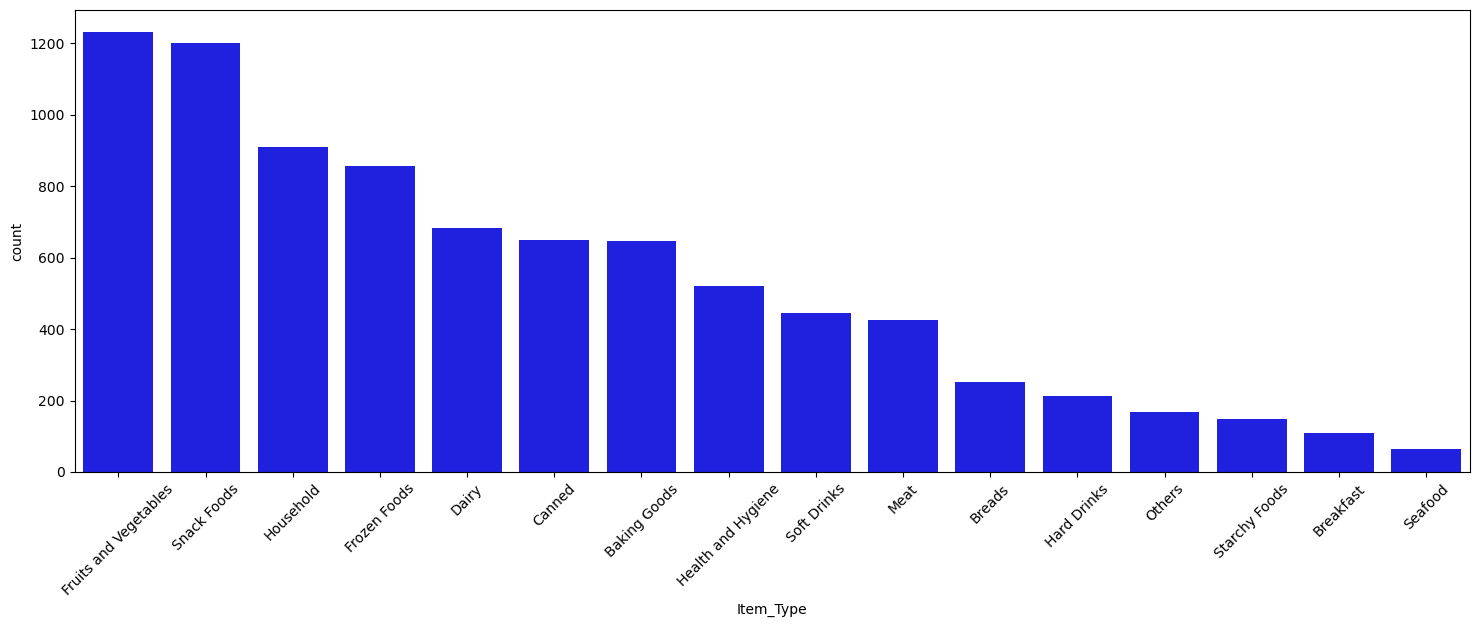

In [137]:
fig = plt.figure(figsize = (18, 6))

sns.countplot(x = 'Item_Type', data = df_tr, color = 'blue', order = df_tr['Item_Type'].value_counts().index);

plt.xticks(rotation = 45);

Die meist verkauften Artikel sind Früchte und Gemüse, gefolgt von Snack und Haushaltsartikeln. 

##### **Nummerische Variablen**

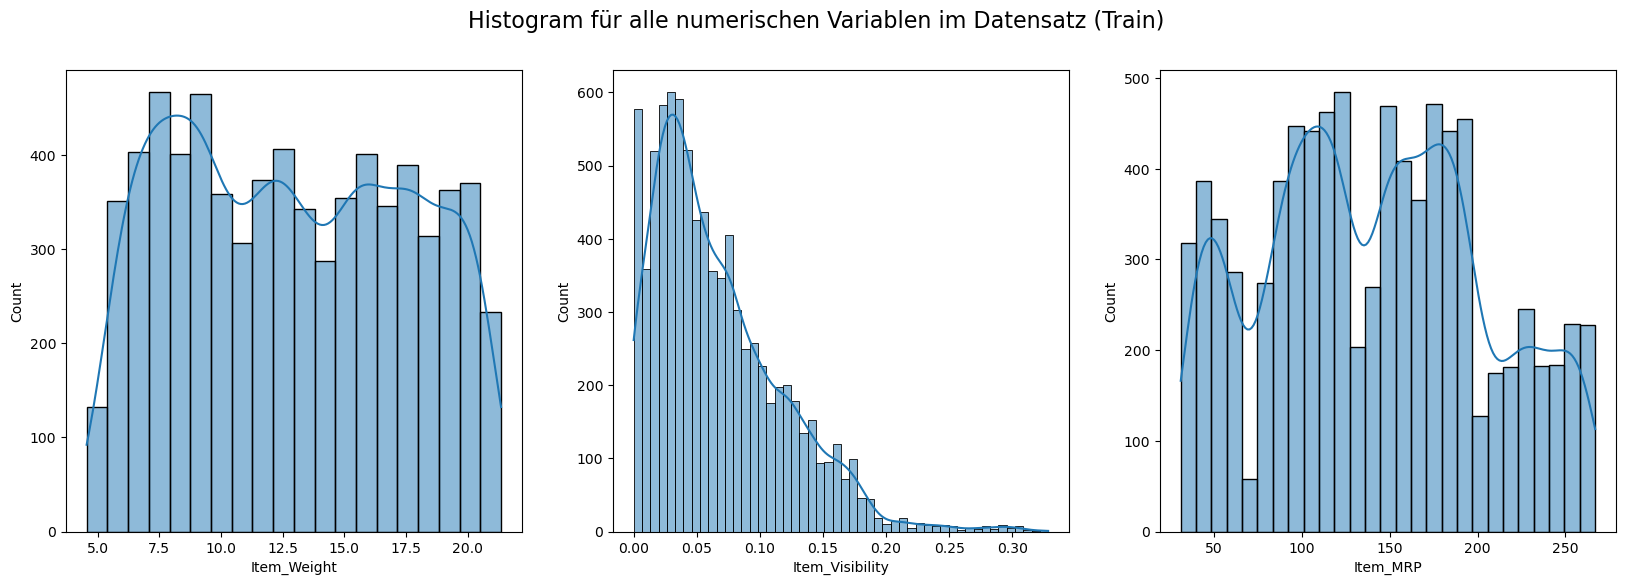

In [138]:
fig, axes = plt.subplots(1, 3, figsize = (20, 6))
  
fig.suptitle('Histogram für alle numerischen Variablen im Datensatz (Train)', fontsize=16)
  
sns.histplot(x = 'Item_Weight', data = df_tr, kde = True, ax = axes[0]);

sns.histplot(x = 'Item_Visibility', data = df_tr, kde = True, ax = axes[1]);

sns.histplot(x = 'Item_MRP', data = df_tr, kde = True, ax = axes[2]);

Die Variable **Item_Weight** ist annährend gleichmaessig verteilt. Beim Einfügen der fehlenden Werte muss darauf geachtet werden, dass sich die Verteilung nach dem Einfügen bzw. Ersetzen nicht wesentlich verändert.

Die Variable **Item_Visibility** weist eine rechtsschiefe Verteilung auf. Das bedeutet, dass es einige Produkte gibt, deren Anteil an der gesamten Regalfläche deutlich höher ist als bei den übrigen Produkten.

Die Variable **Item_MRP** folgt einer annährend multimodalen Normalverteilung.

----------  
#### Univariate Analyse der AV
----------

In [139]:
df_tr['Item_Outlet_Sales'].unique()

array([3735.138 ,  443.4228, 2097.27  , ..., 7182.6504, 3608.636 ,
       2778.3834], shape=(3493,))

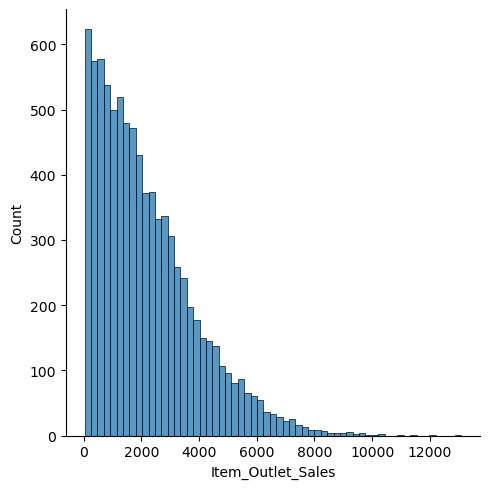

In [140]:
sns.displot(df_tr['Item_Outlet_Sales'])

**Interpretation**
***Verteilung***  
Rechtsschief. Die meisten umsatzwerte liegen im unteren Bereich. Es gibt relativ wenige Produkte mit sehr hohen Umsätzen.  
***Stats***  
Der Median liegt sehr wahrscheinlich unter dem Mittelwert aufgrund der Rechtsschiefe. die meisten Produkte haben niedrige bis mittlere Umsätze. einzelne Bestseller bzw. Runner mit hohen Umsätzen ziehen den Durchschnitt nach oben.  
***Relevanz für Model***  
Die Verteilung kann bei der multiplen Regression problematisch sein, da Normalverteilung der Residuen vorauszusetzen ist bzw. IID.  Eine Log-Transformation könnte sinnvoll sein um die Verteilung zu normalisieren und Voraussetzung der Modelgüte zu verbessern. Ausreisser wie sehr hohe Umsätze, könnten das Modell beeinflussen. 


#### Bivariate Analyse

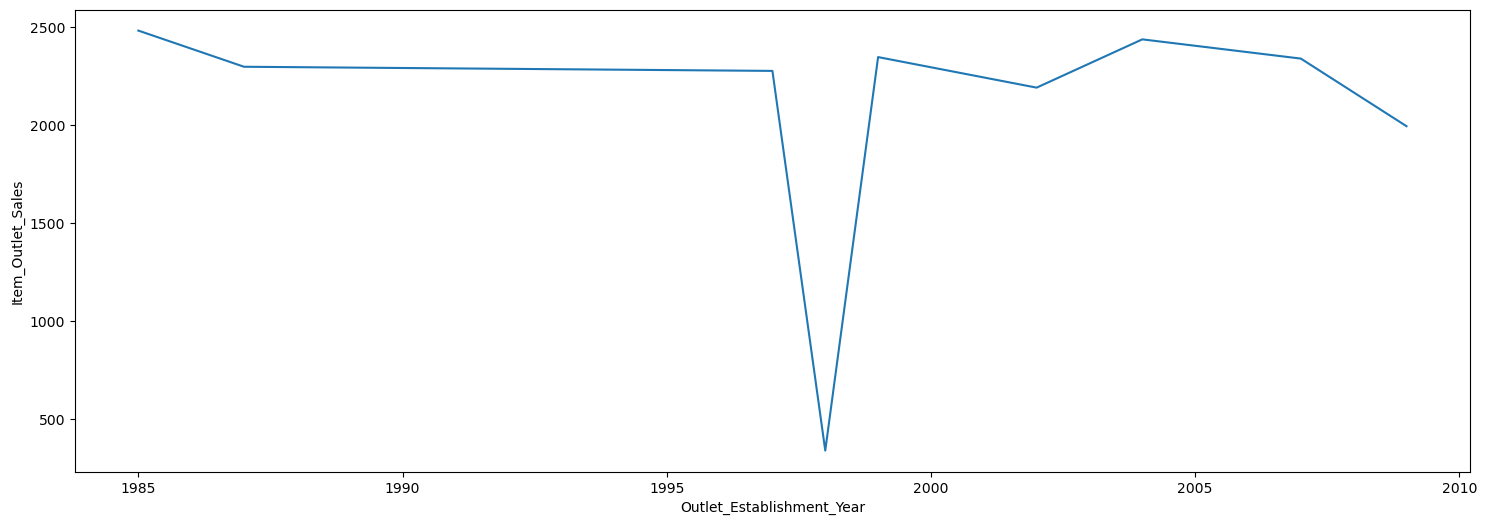

In [141]:
fig = plt.figure(figsize = (18, 6))

sns.lineplot(x = 'Outlet_Establishment_Year', y = 'Item_Outlet_Sales', data = df_tr, ci = None, estimator='mean');

Die durchschnittlichen Umsätze sind über die Jahre nahezu konstant. Es ist kein steigender oder fallender Trend im Zeitverlauf erkennbar. Daher ist die Variable Year möglicherweise kein guter Prädiktor für die Umsatzvorhersage. Dies wird später in der Modellierungsphase überprüft.

Um das Jahr 1998 sind die durchschnittlichen Umsätze jedoch stark eingebrochen. Dies könnte auf externe Faktoren zurückzuführen sein, die im Datensatz nicht enthalten sind.

----
##### **Überprüfung Multikollinarität**
----

(array([0.5, 1.5, 2.5, 3.5, 4.5]),
 [Text(0.5, 0, 'Item_Weight'),
  Text(1.5, 0, 'Item_Visibility'),
  Text(2.5, 0, 'Item_MRP'),
  Text(3.5, 0, 'Outlet_Establishment_Year'),
  Text(4.5, 0, 'Item_Outlet_Sales')])

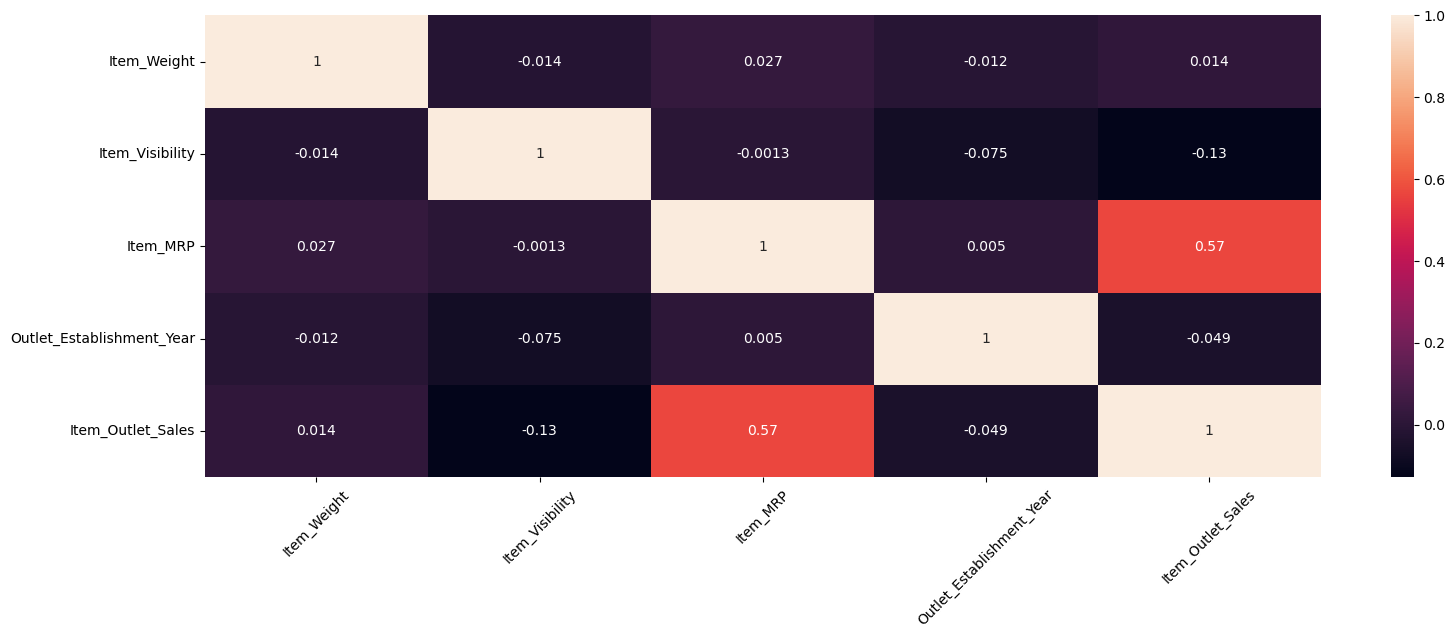

In [142]:
fig = plt.figure(figsize = (18, 6))

# Select only numeric columns for correlation
numeric_df = df_tr.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot = True)

plt.xticks(rotation = 45)

Der Plot zeigt, dass nur die unabhängige Variable Item_MRP eine relativ lineare Beziehung zur abhängigen Variable Item_Outlet_Sales aufweist.

Für die übrigen Variablen ist keine starke positive oder negative Korrelation erkennbar.

Als Nächstes sollen die bivariate Scatterplots, mehr Infos liefern um die Beziehungen zwischen den unabhängigen Variablen und der abhängigen Variable zu untersuchen.

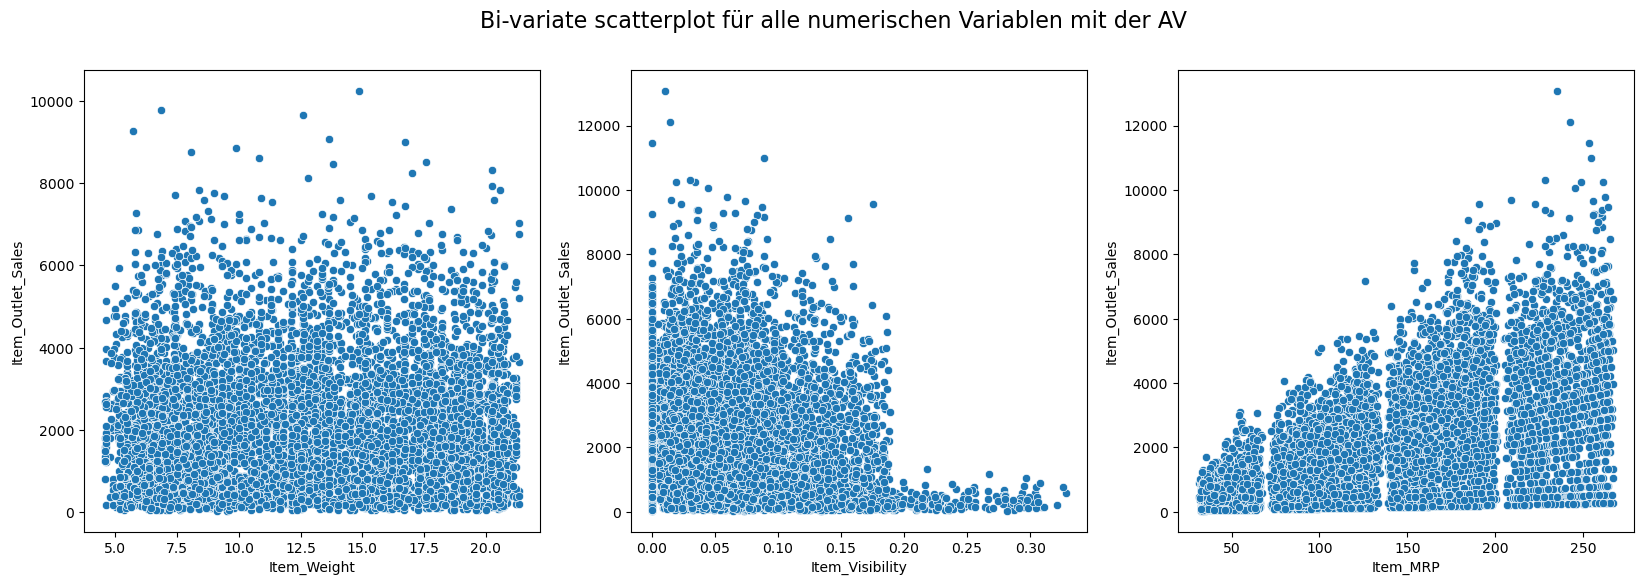

In [143]:
fig, axes = plt.subplots(1, 3, figsize = (20, 6))
  
fig.suptitle('Bi-variate scatterplot für alle numerischen Variablen mit der AV', fontsize=16)
  
sns.scatterplot(x = 'Item_Weight', y = 'Item_Outlet_Sales', data = df_tr, ax = axes[0]);

sns.scatterplot(x = 'Item_Visibility', y = 'Item_Outlet_Sales', data = df_tr, ax = axes[1]);

sns.scatterplot(x = 'Item_MRP', y = 'Item_Outlet_Sales', data = df_tr, ax = axes[2]);

Der erste Scatterplot zeigt keine erkennbare Beziehung zwischen **Item_Weight** und **AV**, was auch durch die fehlende Korrelation zuvor bestätigt wurde.

Zwischen **Item_Visibility** und **AV** besteht ebenfalls keine starke Beziehung bzw. Zusammenhang. Ab etwa 0,19 nimmt der Umsatz jedoch ab, was auf eine gezielte höhere Sichtbarkeit schwächer bzw. teurer verkaufter Produkte hindeuten könnte.

Der Scatterplot von **Item_MRP** und **AV** zeigt eine klare positive Korrelation, womit Item_MRP eine guter Prädiktor für den Umsatz sein kann.

---
### Zusammenfassung EDA
---

Der univariate Plot von **Item_Fat_Content** zeigt **Inkonsistenzen** in den Kategorien. Low Fat erscheint auch als low fat und LF, Regular teilweise als reg. Diese Fehler wurde **mittels Lamdafunktion** in den Daten **korrigiert** werden.

In **Outlet_Size** ist Medium die häufigste Kategorie, gefolgt von Small und High. **Bedarf zur Behandlung fehlender Werte**

**Outlet_Location_Type** wird von Tier 3 dominiert, danach folgen Tier 2 und Tier 1. In Kombination mit Outlet_Size ist dies plausibel, da grosse Filialen eher in Tier 1 "Städten" vorkommen, die insgesamt seltener vertreten sind.

In **Outlet_Type** ueberwiegt Supermarket Type 1, während Supermarket Type 2, Supermarket Type 3 und Grocery Store deutlich seltener und ähnlich häufig sind.

Die **meisten verkauften Produkte** gehören zur Kategorie **Fruits and Vegetables**, gefolgt von Snack Foods und Household.

**Item_Weight** ist annährend gleichmässig verteilt. Bei der **Behandlung fehlender Werte** sollte die Verteilung möglichst erhalten bleiben.

**Item_Visibility** ist rechtsschief verteilt, was darauf hinweist, dass einige Produkte eine höhere Sichtbarkeit haben als andere.

**Item_MRP** folgt einer annährend multimodalen Normalverteilung.

Die **durchschnittlichen Umsätze** sind über die Jahre relativ konstant. Ein klarer Zeittrend ist nicht erkennbar, da Year vermutlich kein starker Prädiktor ist.  
**Um das Jahr 1998** kam es zum **starken Einbruch** der **durchschnittlichen Umsätze**, möglicherweise durch externe, nicht erfasste Faktoren.

**Von allen unabhängigen Variablen zeigt nur Item_MRP eine relativ lineare Beziehung zur AV, Item_Outlet_Sales.**

Für die übrigen Variablen sind keine starken positiven oder negativen Korrelationen erkennbar.

Der Scatterplot von Item_Weight und Item_Outlet_Sales zeigt keine Beziehung, was durch die geringe Korrelation bestätigt wird.

Zwischen Item_Visibility und Item_Outlet_Sales besteht ebenfalls keine starke Beziehung. Ab einem Wert von etwa 0,19 sinken die Umsätze, was auf bewusst höhere Sichtbarkeit schlechter verkaufter Produkte hindeuten könnte.

Der Scatterplot von Item_MRP und Item_Outlet_Sales zeigt eine klare positive Korrelation, womit Item_MRP eine gute Vorhersagekraft für die Umsätze besitzt.

---
#### **Behandlung fehlender Werte**
---

In [144]:
df_tr.apply(lambda x: sum(x.isnull()))

Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

##### **Für Prädiktor Item_Weight**

Die fehlenden Werte der Variable **Item_Weight** werden ersetzt. Es gibt verschiedene Methoden wie z.B. die Ersetzung durch Mittelwert, Median oder durch fortgeschrittene Verfahren wie KNN. In diesem Fall wird versucht, Zusammenhänge zwischen Item_Weight und anderen Variablen im Datensatz zu nutzen, um die fehlenden Werte sinnvoll zu ersetzen bzw. aufzufüllen.  
   
Dabei sollte sich die Gesamtverteilung der jeweiligen Variable nicht wesentlich verändern.

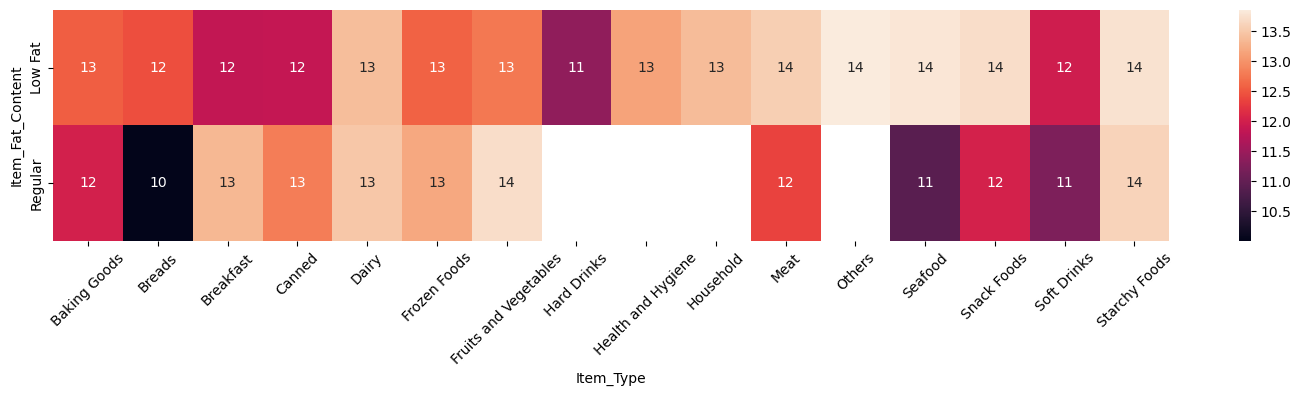

In [145]:
fig = plt.figure(figsize = (18, 3))

sns.heatmap(df_tr.pivot_table(index = 'Item_Fat_Content', columns = 'Item_Type', values = 'Item_Weight'), annot = True);

plt.xticks(rotation = 45);

In der Heatmap ist zu erkennen, dass die Range von Item_Weight in Abhaengigkeit von verschiedenen Kombinationen aus Item_Type und Item_Fat_Content zwischen einem Minimalwert von 10 und einem Maximalwert von 14 liegt.

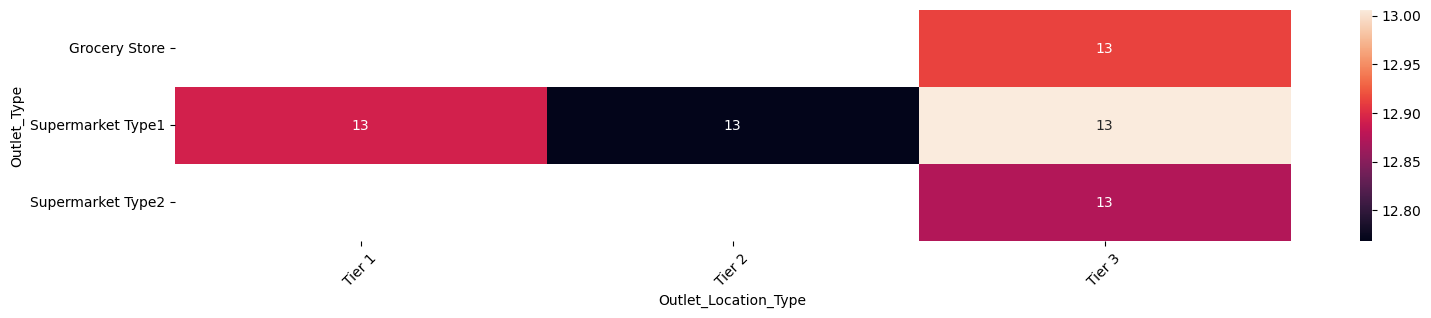

In [146]:
fig = plt.figure(figsize = (18, 3))

sns.heatmap(df_tr.pivot_table(index = 'Outlet_Type', columns = 'Outlet_Location_Type', values = 'Item_Weight'), annot = True);

plt.xticks(rotation = 45);

Die Heatmap oben zeigt, dass der durchschnittliche Wert von Item_Weight über alle Kombinationen von Outlet_Type und Outlet_Location_Type konstant bei 13 liegt.

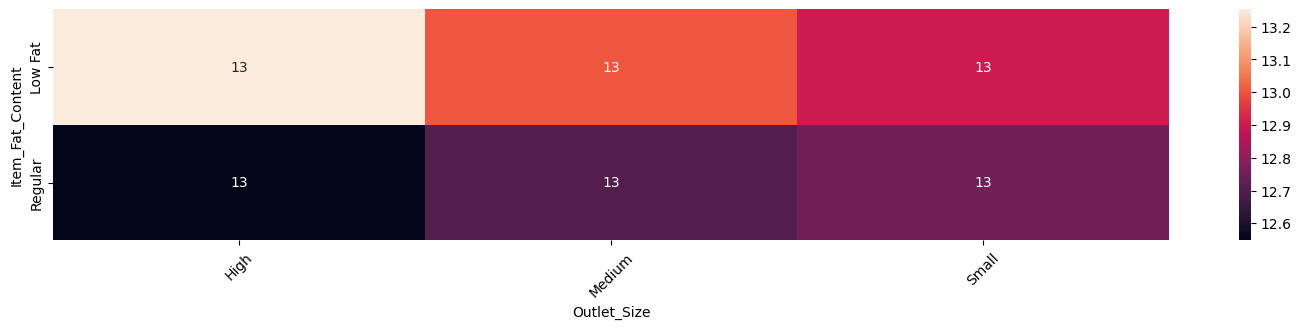

In [147]:
fig = plt.figure(figsize = (18, 3))

sns.heatmap(df_tr.pivot_table(index = 'Item_Fat_Content', columns = 'Outlet_Size', values = 'Item_Weight'), annot = True);

plt.xticks(rotation = 45);

In der obigen Heatmap ist zu erkennen, dass der durchschnittliche Wert von Item_Weight über alle Kombinationen von Item_Fat_Content und Outlet_Size ebenfalls konstant bei 13 liegt.

**Die fehlenden Werte werden wie folgt, mithilfe einer Gleichverteilung mittels random.uniform Methode mit den Parametern zwischen 10 und 14, ersetzt.**

In [148]:
item_weight_indices_to_be_updated = df_tr[df_tr['Item_Weight'].isnull()].index

df_tr.loc[item_weight_indices_to_be_updated, 'Item_Weight'] = np.random.uniform(10, 14, len(item_weight_indices_to_be_updated))

In [149]:
item_weight_indices_to_be_updated = df_te[df_te['Item_Weight'].isnull()].index

df_te.loc[item_weight_indices_to_be_updated, 'Item_Weight'] = np.random.uniform(10, 14, len(item_weight_indices_to_be_updated))

In [150]:
df_tr.apply(lambda x: sum(x.isnull()))

Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

##### **Für Item_Size**

Die Groesse der Filiale haengt zusammen mit den Praediktoren Outlet_Type und Outlet_Location_Type. Um festzustellen und vergleichen zu koennen wo bzw. welche Filialen ( Outlet_Type und Outlet_Location_Type) in Bezug bzw. Beziehung zur Groesse Outlet_Size fehlende Eintraege haben.  
So die Überlegung zwei Datensätze zu erstellen d.h. eine mit fehlenden Werten (isnull) für den Barplot, sowie eine ohne fehlenden Werten (notnull) für die Kreuztabellen wie zuvor mit den relevanten Prädiktoren von Item_Size sprich Outlet_Type und Outlet_Location_Type. 

In [151]:
outlet_size_notnull = df_tr[df_tr['Outlet_Size'].notnull()]

outlet_size_isnull = df_tr[df_tr['Outlet_Size'].isnull()]

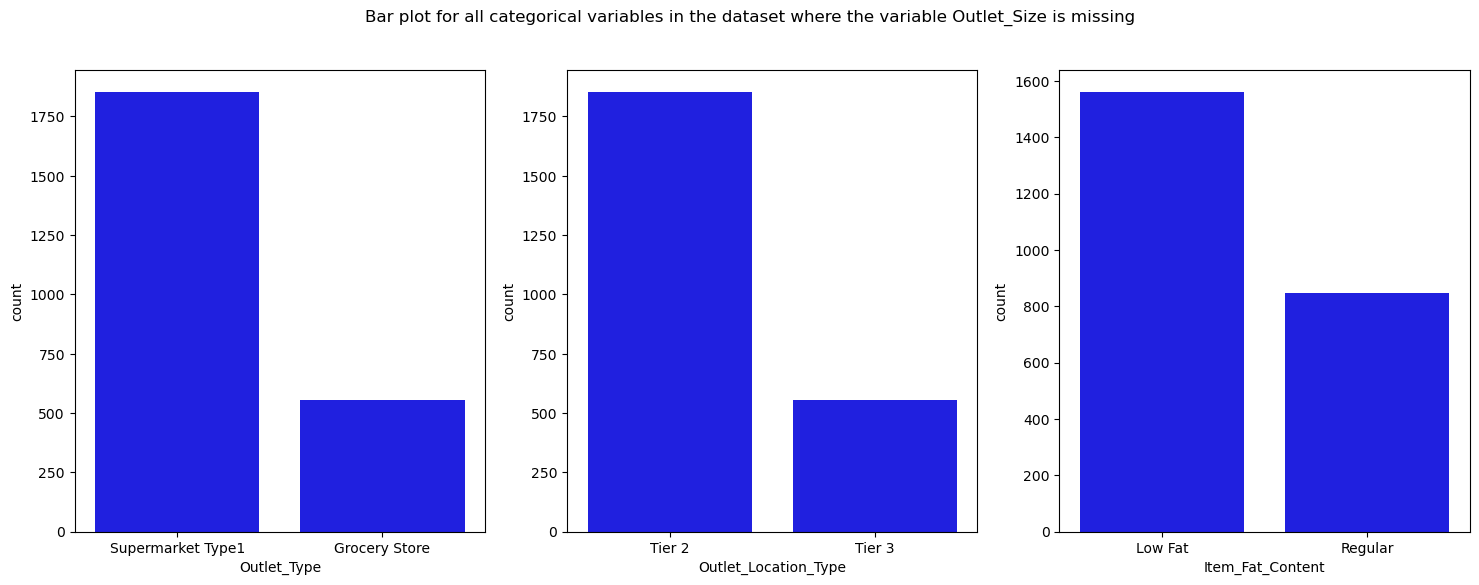

In [152]:
fig, axes = plt.subplots(1, 3, figsize = (18, 6))
  
fig.suptitle('Bar plot for all categorical variables in the dataset where the variable Outlet_Size is missing')
  
sns.countplot(ax = axes[0], x = 'Outlet_Type', data =outlet_size_isnull, color = 'blue', 
              order = outlet_size_isnull['Outlet_Type'].value_counts().index);

sns.countplot(ax = axes[1], x = 'Outlet_Location_Type', data = outlet_size_isnull, color = 'blue', 
              order = outlet_size_isnull['Outlet_Location_Type'].value_counts().index);
sns.countplot(ax = axes[2], x = 'Item_Fat_Content', data = outlet_size_isnull, color = 'blue', 
              order = outlet_size_isnull['Item_Fat_Content'].value_counts().index);

Die meist fehlenden Werte hat in Prädiktor...  
***...Outlet_Type***  
Supermarket Type 1  
***...Outlet_Location_Type***  
Tier 2  
***...Item_Fat_Content***  
Low Fat

**Nun werden diese kat. Variablen mittels Kreuztabelle in Bezug auf Outlet_Size auf mögliche Muster verglichen d.h. mit fehlenden Werten (isnull).**  
Um zu sehen wo und wie diese ersetzt werden sollen.


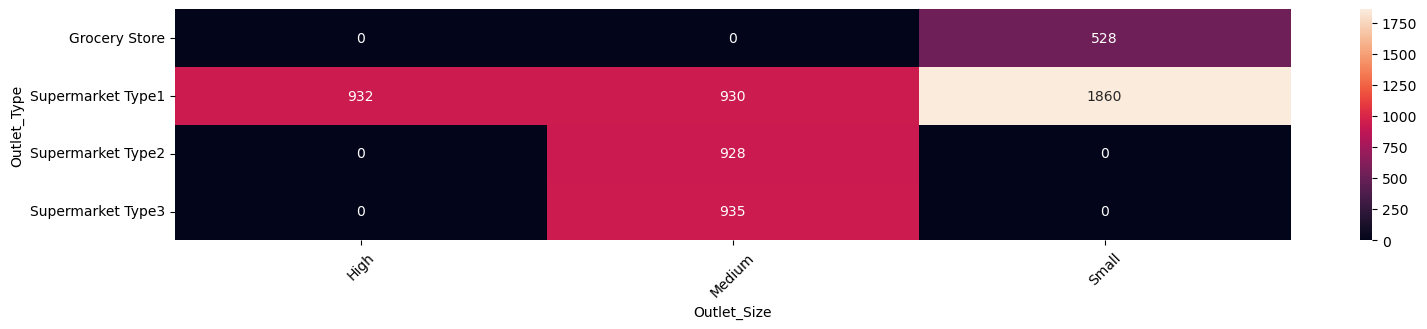

In [153]:
fig= plt.figure(figsize = (18, 3))

sns.heatmap(pd.crosstab(index = outlet_size_notnull['Outlet_Type'], columns = outlet_size_notnull['Outlet_Size']), annot = True, fmt = 'g')

plt.xticks(rotation = 45);

**Grocery Store** haben Filialgroesse small.  
**Supermarket Type 2 und 3** haben Filialgroesse medium. 

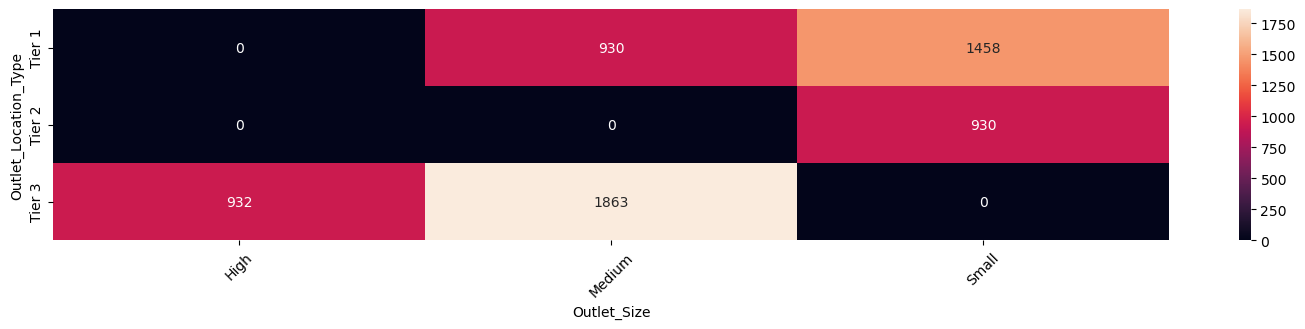

In [154]:
fig = plt.figure(figsize = (18, 3))

sns.heatmap(pd.crosstab(index = outlet_size_notnull['Outlet_Location_Type'], columns = outlet_size_notnull['Outlet_Size']), annot = True, fmt = 'g')

plt.xticks(rotation = 45);

**Alle Tier 2 Filialen sind small.**

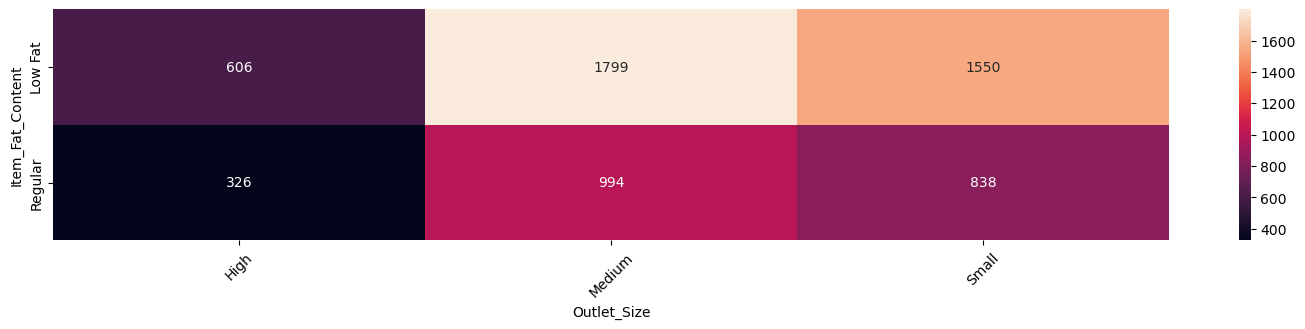

In [155]:
fig = plt.figure(figsize = (18, 3))

sns.heatmap(pd.crosstab(index = outlet_size_notnull['Item_Fat_Content'], columns = outlet_size_notnull['Outlet_Size']), annot = True, fmt = 'g')

plt.xticks(rotation = 45);

**Kein Muster bzw. klarer Zusammenhang zwischen Fettanteil und Filialgroesse.**

Die Erkannten Muster zwischen Outlet_Size und Outlet, -Location und -Type geben aufschluss, um die fehlenden Werte in der Spalte Outlet_Size zu ersetzen. 

Im Folgenden werden die Indizes im DataFrame identifiziert, bei denen Outlet_Size fehlt und der Outlet_Type Grocery Store ist, um diese fehlenden Werte basierend auf den zuvor erkannten Mustern durch Small zu ersetzen. So werden die Indizes bestimmt bei denen Outlet_Size fehlt und der Outlet_Location_Type Tier 2 ist, um auch diese fehlenden Werte entsprechend zu ersetzen.

In [156]:
grocery_store_indices = df_tr[df_tr['Outlet_Size'].isnull()].query(" Outlet_Type == 'Grocery Store' ").index

tier_2_indices = df_tr[df_tr['Outlet_Size'].isnull()].query(" Outlet_Location_Type == 'Tier 2' ").index

Folgend werden diese Indizes für die Spalte Outlet_Size mit Wert Small ersetzt. 

In [157]:
df_tr.loc[grocery_store_indices, 'Outlet_Size'] = 'Small'

df_tr.loc[tier_2_indices, 'Outlet_Size'] = 'Small'

Das gleiche für Test Datensatz. 

In [158]:
grocery_store_indices = df_te[df_te['Outlet_Size'].isnull()].query(" Outlet_Type == 'Grocery Store' ").index

tier_2_indices = df_te[df_te['Outlet_Size'].isnull()].query(" Outlet_Location_Type == 'Tier 2' ").index

In [159]:
df_te.loc[grocery_store_indices, 'Outlet_Size'] = 'Small'

df_te.loc[tier_2_indices, 'Outlet_Size'] = 'Small'

Überprüfen

In [160]:
df_tr.isnull().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [161]:
df_te.isnull().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

## Feature Engineering

Nachdem wir die Datenanalyse und Datenaufbereitung abgeschlossen haben, denken wir vor dem Modellierungsschritt darüber nach, welche Features nicht im Datensatz vorhanden sind, aber aus den bestehenden Spalten erstellt werden können und möglicherweise prädiktive Kraft für die Vorhersage des Umsatzes haben. Dieser Schritt der Erstellung neuer Features aus bestehenden Features wird als **Feature Engineering** bezeichnet.

Gemäss H2: **Je älter das Geschäft, desto höher der Umsatz.** Wie soll "alt" definiert werden ? Aus verschiedenen Quellen auf Kaggle geht hervor das die Daten 2013 erhoben wurden. Das Alter kann also berechnet werden, indem das Gründungsjahr von 2013 subtrahiert wird.

Wir erstellen ein neues Feature **Outlet_Age**, welches angibt, wie alt das Geschäft ist.

In [162]:
df_tr['Outlet_Age'] = 2013 - df_tr['Outlet_Establishment_Year']

df_te['Outlet_Age'] = 2013 - df_te['Outlet_Establishment_Year']

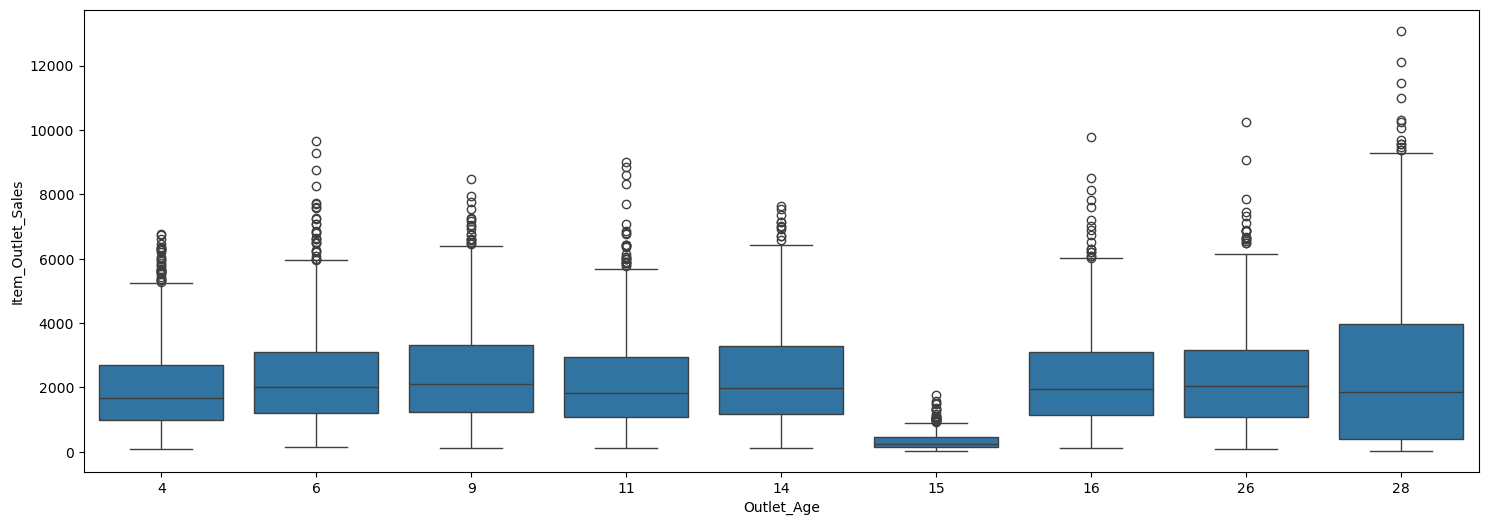

In [163]:
fig = plt.figure(figsize = (18, 6))

sns.boxplot(x = 'Outlet_Age', y = 'Item_Outlet_Sales', data = df_tr);

**Beobachtungen:**
- Die Hypothese **"Je älter das Geschäft, desto höher der Umsatz"** scheint basierend auf dem obigen Plot nicht zu stimmen. Die Umsätze sind bei verschiedenen Altersgruppen der Geschäfte ungefähr gleich verteilt.
- Diese Variable wird vorerst beibehaltet und in der Modellierung aufgegriffen.

## Modellierung

Nachdem wir alle Variablen im Datensatz analysiert haben, können wir mit der Modellerstellung beginnen. Wir haben beobachtet, dass nicht alle unabhängigen Variablen wichtig sind, um die Zielvariable vorherzusagen. Zu Beginn verwenden wir alle Variablen und entscheiden dann anhand des Model-Summary-Reports, welche Variablen entfernt werden sollen. Modellerstellung folgt Iterativ gemäss Codevibing.

In [164]:
# Wir entfernen die Zielvariable aus dem Feature-Set
# Auch die Variable Outlet_Establishment_Year wird entfernt, da wir Outlet_Age erstellt haben
train_features = df_tr.drop(['Item_Outlet_Sales', 'Outlet_Establishment_Year'], axis = 1)

# Zielvariable separat extrahieren
train_target = df_tr['Item_Outlet_Sales']

### Dummy-Variablen erstellen

Kategorische Variablen als unabhängige Variablen mittels **One-Hot-Encoded** Darstellung (auch bekannt als Dummy-Variablen)erstellt. Die erste Kategorie wird als **Referenzvariable** entfernt, um Multikollinearität zu vermeiden.

In [165]:
# Dummy-Variablen für kategorische Variablen erstellen
train_features = pd.get_dummies(train_features, drop_first = True)

train_features.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,...,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,14,False,False,False,False,True,False,...,False,False,False,True,False,False,False,True,False,False
1,5.92,0.019278,48.2692,4,True,False,False,False,False,False,...,False,True,False,True,False,False,True,False,True,False
2,17.50,0.016760,141.6180,14,False,False,False,False,False,False,...,False,False,False,True,False,False,False,True,False,False
3,19.20,0.000000,182.0950,15,True,False,False,False,False,False,...,False,False,False,False,True,False,True,False,False,False
4,8.93,0.000000,53.8614,26,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,False,False


### Skalierung der Daten

Wir skalieren die numerischen Variablen, damit sie den gleichen Wertebereich haben. Ohne Skalierung würde das Modell Variablen mit höherem Wertebereich bevorzugen. Hier verwenden wir den **MinMaxScaler**, da wir sowohl kategorische als auch numerische Variablen haben und die Dummy-Kodierungen nicht verändern wollen.

In [166]:
# Instanz des MinMaxScaler erstellen
scaler = MinMaxScaler()

# fit_transform auf die Trainingsdaten anwenden
train_features_scaled = scaler.fit_transform(train_features)

# Array zurück in DataFrame konvertieren
train_features_scaled = pd.DataFrame(train_features_scaled, index = train_features.index, columns = train_features.columns)

train_features_scaled.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,...,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,0.282525,0.048866,0.927507,0.416667,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.081274,0.058705,0.072068,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.770765,0.051037,0.468288,0.416667,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.871986,0.000000,0.640093,0.458333,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.260494,0.000000,0.095805,0.916667,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


### Erstes Modell erstellen

Jetzt erstellen wir das Modell mit dem **statsmodels** Paket.

In [167]:
# Intercept-Term hinzufügen
train_features_scaled = sm.add_constant(train_features_scaled)

# OLS-Algorithmus auf die Features und Zielvariable anwenden
ols_model_0 = sm.OLS(train_target, train_features_scaled)

# Modell fitten
ols_res_0 = ols_model_0.fit()

print(ols_res_0.summary())

                            OLS Regression Results                            
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.563
Model:                            OLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                     405.8
Date:                 So, 18 Jan 2026   Prob (F-statistic):               0.00
Time:                        23:08:54   Log-Likelihood:                -71993.
No. Observations:                8523   AIC:                         1.440e+05
Df Residuals:                    8495   BIC:                         1.442e+05
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

**Interpretation der Regressionsergebnisse:**

1. **Adj. R-squared**: Reflektiert die Anpassungsgüte des Modells. Werte von 0 bis 1, wobei höhere Werte eine bessere Anpassung bedeuten.

2. **coeff**: Repräsentiert die Änderung der Zielvariable bei einer Änderung der unabhängigen Variable um eine Einheit (bei Konstanthaltung aller anderen Variablen).

3. **std err**: Reflektiert die Genauigkeit der Koeffizienten. Je niedriger, desto genauer.

4. **P >|t|**: Der p-Wert.
   - Nullhypothese (H0): Unabhängige Variable ist nicht signifikant.
   - Alternativhypothese (Ha): Unabhängige Variable ist signifikant.
   - Ein p-Wert < 0.05 gilt als statistisch signifikant (95% Konfidenzniveau).

5. **Konfidenzintervall**: Gibt den Bereich an, in dem die Koeffizienten wahrscheinlich liegen (mit 95% Wahrscheinlichkeit).

## Feature Selection

### Multikollinearität entfernen

**Multikollinearität** tritt auf, wenn Prädiktorvariablen in einem Regressionsmodell korreliert sind. Dies ist problematisch, da Prädiktorvariablen unabhängig sein sollten. Bei hoher Korrelation zwischen unabhängigen Variablen werden die Koeffizienten unzuverlässig.

**Variance Inflation Factor (VIF):**
- Misst, wie stark die Varianz des geschätzten Regressionskoeffizienten durch Kollinearität "aufgebläht" wird.
- **VIF = 1**: Keine Korrelation
- **VIF > 5**: Moderate Multikollinearität
- **VIF ≥ 10**: Hohe Multikollinearität

In [168]:
vif_series = pd.Series(
    [variance_inflation_factor(train_features_scaled.values, i) for i in range(train_features_scaled.shape[1])],
    index = train_features_scaled.columns,
    dtype = float)

print("VIF Scores: \n\n{}\n".format(vif_series))

VIF Scores: 

const                              1727.002536
Item_Weight                           1.019182
Item_Visibility                       1.101095
Item_MRP                              1.013235
Outlet_Age                           50.920827
Item_Fat_Content_Regular              1.216509
Item_Type_Breads                      1.349904
Item_Type_Breakfast                   1.158259
Item_Type_Canned                      1.853158
Item_Type_Dairy                       1.906348
Item_Type_Frozen Foods                2.093557
Item_Type_Fruits and Vegetables       2.497681
Item_Type_Hard Drinks                 1.331150
Item_Type_Health and Hygiene          1.771815
Item_Type_Household                   2.290010
Item_Type_Meat                        1.581344
Item_Type_Others                      1.263982
Item_Type_Seafood                     1.091643
Item_Type_Snack Foods                 2.469091
Item_Type_Soft Drinks                 1.629133
Item_Type_Starchy Foods               1.211314

**Outlet_Age** hat einen hohen VIF-Score. Daher entfernen wir diese Variable und erstellen das Modell neu.

In [169]:
train_features_scaled_new = train_features_scaled.drop("Outlet_Age", axis = 1)

vif_series = pd.Series(
    [variance_inflation_factor(train_features_scaled_new.values, i) for i in range(train_features_scaled_new.shape[1])],
    index = train_features_scaled_new.columns,
    dtype = float)

print("VIF Scores: \n\n{}\n".format(vif_series))

VIF Scores: 

const                              121.446358
Item_Weight                          1.019110
Item_Visibility                      1.101074
Item_MRP                             1.013194
Item_Fat_Content_Regular             1.216466
Item_Type_Breads                     1.349603
Item_Type_Breakfast                  1.158250
Item_Type_Canned                     1.853096
Item_Type_Dairy                      1.906346
Item_Type_Frozen Foods               2.093312
Item_Type_Fruits and Vegetables      2.497508
Item_Type_Hard Drinks                1.331069
Item_Type_Health and Hygiene         1.771780
Item_Type_Household                  2.289990
Item_Type_Meat                       1.581331
Item_Type_Others                     1.263928
Item_Type_Seafood                    1.091482
Item_Type_Snack Foods                2.469040
Item_Type_Soft Drinks                1.629129
Item_Type_Starchy Foods              1.211311
Outlet_Size_Medium                  10.992883
Outlet_Size_Small   

Modell erstellen und die p-Werte überprüfen.

In [170]:
ols_model_2 = sm.OLS(train_target, train_features_scaled_new)

ols_res_2 = ols_model_2.fit()

print(ols_res_2.summary())

                            OLS Regression Results                            
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.563
Model:                            OLS   Adj. R-squared:                  0.561
Method:                 Least Squares   F-statistic:                     420.6
Date:                 So, 18 Jan 2026   Prob (F-statistic):               0.00
Time:                        23:08:55   Log-Likelihood:                -71997.
No. Observations:                8523   AIC:                         1.440e+05
Df Residuals:                    8496   BIC:                         1.442e+05
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

Es ist keine gute Praxis, VIF-Werte für Dummy-Variablen zu betrachten, da diese oft untereinander korreliert sind. Wir sehen, dass alle Kategorien in der Spalte **Item_Type** einen p-Wert > 0.05 haben. Daher können wir diese Spalte entfernen.

In [171]:
train_features_scaled_new2 = train_features_scaled_new.drop(['Item_Type_Breads',
'Item_Type_Breakfast',
'Item_Type_Canned',
'Item_Type_Dairy',
'Item_Type_Frozen Foods',
'Item_Type_Fruits and Vegetables',
'Item_Type_Hard Drinks',
'Item_Type_Health and Hygiene',
'Item_Type_Household',
'Item_Type_Meat',
'Item_Type_Others',
'Item_Type_Seafood',
'Item_Type_Snack Foods',
'Item_Type_Soft Drinks',
'Item_Type_Starchy Foods'], axis = 1)

vif_series = pd.Series(
    [variance_inflation_factor(train_features_scaled_new2.values, i) for i in range(train_features_scaled_new2.shape[1])],
    index = train_features_scaled_new2.columns,
    dtype = float)

print("VIF Scores: \n\n{}\n".format(vif_series))

VIF Scores: 

const                            109.518605
Item_Weight                        1.006467
Item_Visibility                    1.093173
Item_MRP                           1.000858
Item_Fat_Content_Regular           1.003017
Outlet_Size_Medium                10.983276
Outlet_Size_Small                 12.265220
Outlet_Location_Type_Tier 2        2.689563
Outlet_Location_Type_Tier 3        7.527634
Outlet_Type_Supermarket Type1      5.944789
Outlet_Type_Supermarket Type2      4.226074
Outlet_Type_Supermarket Type3      4.260173
dtype: float64



In [172]:
ols_model_3 = sm.OLS(train_target, train_features_scaled_new2)

ols_res_3 = ols_model_3.fit()

print(ols_res_3.summary())

                            OLS Regression Results                            
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.563
Model:                            OLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                     994.9
Date:                 So, 18 Jan 2026   Prob (F-statistic):               0.00
Time:                        23:08:55   Log-Likelihood:                -72000.
No. Observations:                8523   AIC:                         1.440e+05
Df Residuals:                    8511   BIC:                         1.441e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

Aus den p-Werten können wir sehen, dass **Item_Weight** den höchsten p-Wert hat, d.h. es ist die am wenigsten signifikante Variable. Diese wird entfernt.

In [173]:
train_features_scaled_new3 = train_features_scaled_new2.drop("Item_Weight", axis = 1)

ols_model_4 = sm.OLS(train_target, train_features_scaled_new3)

ols_res_4 = ols_model_4.fit()

print(ols_res_4.summary())

                            OLS Regression Results                            
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.563
Model:                            OLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                     1095.
Date:                 So, 18 Jan 2026   Prob (F-statistic):               0.00
Time:                        23:08:55   Log-Likelihood:                -72000.
No. Observations:                8523   AIC:                         1.440e+05
Df Residuals:                    8512   BIC:                         1.441e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

Aus den obigen p-Werten haben beide Kategorien von **Outlet_Location_Type** einen p-Wert > 0.05. Daher entfernen wir diese.

In [174]:
train_features_scaled_new4 = train_features_scaled_new3.drop(["Outlet_Location_Type_Tier 2", "Outlet_Location_Type_Tier 3"], axis = 1)

ols_model_5 = sm.OLS(train_target, train_features_scaled_new4)

ols_res_5 = ols_model_5.fit()

print(ols_res_5.summary())

                            OLS Regression Results                            
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.562
Model:                            OLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                     1368.
Date:                 So, 18 Jan 2026   Prob (F-statistic):               0.00
Time:                        23:08:55   Log-Likelihood:                -72001.
No. Observations:                8523   AIC:                         1.440e+05
Df Residuals:                    8514   BIC:                         1.441e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

Beide Kategorien von **Outlet_Size** haben ebenfalls einen p-Wert > 0.05. Diese werden entfernt.

In [175]:
train_features_scaled_new5 = train_features_scaled_new4.drop(["Outlet_Size_Small", "Outlet_Size_Medium"], axis=1)

ols_model_6 = sm.OLS(train_target, train_features_scaled_new5)
ols_res_6 = ols_model_6.fit()
print(ols_res_6.summary())

                            OLS Regression Results                            
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.562
Model:                            OLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                     1824.
Date:                 So, 18 Jan 2026   Prob (F-statistic):               0.00
Time:                        23:08:55   Log-Likelihood:                -72002.
No. Observations:                8523   AIC:                         1.440e+05
Df Residuals:                    8516   BIC:                         1.441e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

Zuletzt entfernen wir **Item_Visibility**.

In [176]:
train_features_scaled_new6 = train_features_scaled_new5.drop("Item_Visibility", axis = 1)

vif_series = pd.Series(
    [variance_inflation_factor(train_features_scaled_new6.values, i) for i in range(train_features_scaled_new6.shape[1])],
    index = train_features_scaled_new6.columns,
    dtype = float)

print("VIF Scores: \n\n{}\n".format(vif_series))

VIF Scores: 

const                            11.452496
Item_MRP                          1.000114
Item_Fat_Content_Regular          1.000048
Outlet_Type_Supermarket Type1     2.125686
Outlet_Type_Supermarket Type2     1.654765
Outlet_Type_Supermarket Type3     1.658941
dtype: float64



In [177]:
ols_model_7 = sm.OLS(train_target, train_features_scaled_new6)
ols_res_7 = ols_model_7.fit()
print(ols_res_7.summary())

                            OLS Regression Results                            
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.562
Model:                            OLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                     2188.
Date:                 So, 18 Jan 2026   Prob (F-statistic):               0.00
Time:                        23:08:55   Log-Likelihood:                -72003.
No. Observations:                8523   AIC:                         1.440e+05
Df Residuals:                    8517   BIC:                         1.441e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

**Beobachtungen:**

- Alle VIF-Scores sind jetzt kleiner als 5 - es gibt keine Multikollinearität.
- Alle p-Werte sind kleiner als 0.05, d.h. alle aktuellen Variablen sind signifikant für das Modell.
- Der R-Squared-Wert hat sich nicht wesentlich geändert (~0.56), was bedeutet, dass die entfernten Variablen keinen Mehrwert für das Modell hatten.

Jetzt überprüfen wir die Annahmen der linearen Regression.

## Überprüfung der Annahmen und Modellverbesserung

In diesem Schritt überprüfen wir, ob die folgenden Annahmen für das Modell erfüllt sind:

1. Mittelwert der Residuen sollte 0 sein
2. Normalverteilung der Fehlerterme
3. Linearität der Variablen
4. Keine Heteroskedastizität

### Mittelwert der Residuen und Normalverteilung

In [178]:
# Residuen
residual = ols_res_7.resid 

print("Mittelwert der Residuen:", residual.mean())

Mittelwert der Residuen: -6.812406636299864e-13


Der Mittelwert der Residuen ist sehr nahe bei 0. Die entsprechende Annahme ist erfüllt.

**Test auf Normalverteilung:**
- Fehlerterme/Residuen sollten normalverteilt sein.
- Bei nicht-normalverteilten Fehlertermen können Konfidenzintervalle zu weit oder zu eng werden.
- Überprüfung durch Histogramm oder QQ-Plot.

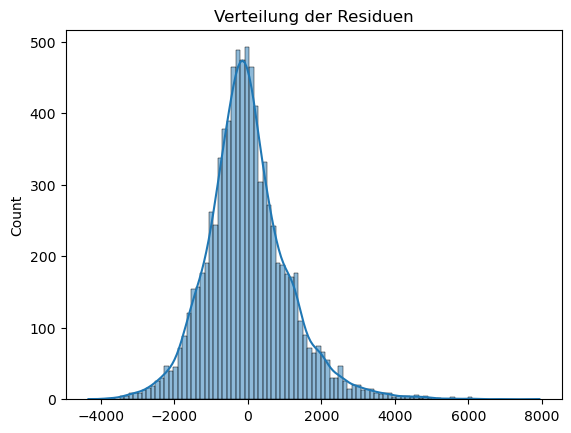

In [179]:
# Histogramm der Residuen
sns.histplot(residual, kde = True)
plt.title('Verteilung der Residuen')
plt.show()

Die Fehlerterme sind normalverteilt. Die Annahme der Normalverteilung ist erfüllt.

### Linearität der Variablen

Es muss eine lineare Beziehung zwischen den Prädiktorvariablen und der abhängigen Variable bestehen. Um diese Annahme zu testen, plotten wir die Residuen gegen die angepassten Werte und stellen sicher, dass die Residuen kein starkes Muster bilden.

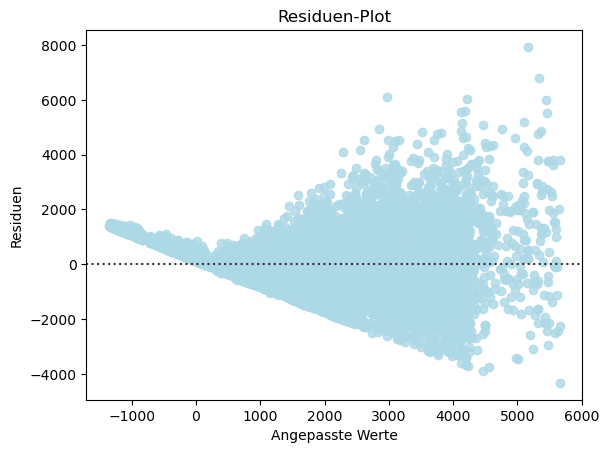

In [180]:
# Vorhergesagte Werte
fitted = ols_res_7.fittedvalues

sns.residplot(x = fitted, y = residual, color = "lightblue")

plt.xlabel("Angepasste Werte")
plt.ylabel("Residuen")
plt.title("Residuen-Plot")
plt.show()

**Beobachtungen:**
- Es gibt ein Muster in den angepassten Werten und Residuen, d.h. die Residuen sind nicht zufällig verteilt.
- Wir versuchen dies zu beheben, indem wir eine **Log-Transformation** auf die Zielvariable anwenden.

In [181]:
# Log-Transformation auf die Zielvariable
train_target_log = np.log(train_target)

# Neues Modell mit transformierter Zielvariable fitten
ols_model_7 = sm.OLS(train_target_log, train_features_scaled_new6)
ols_res_7 = ols_model_7.fit()

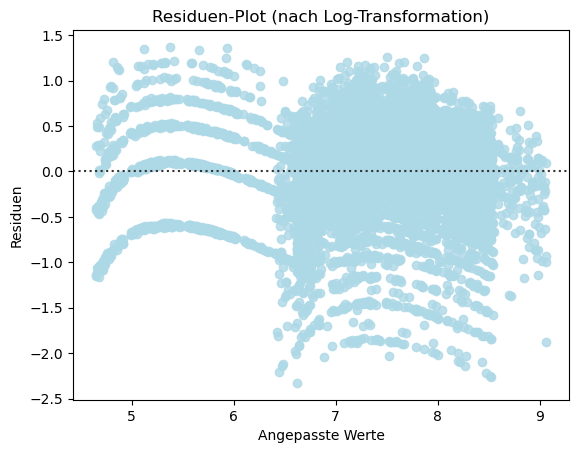

In [182]:
# Vorhergesagte Werte und Residuen des neuen Modells
fitted = ols_res_7.fittedvalues
residual1 = ols_res_7.resid

sns.residplot(x = fitted, y = residual1, color = "lightblue")

plt.xlabel("Angepasste Werte")
plt.ylabel("Residuen")
plt.title("Residuen-Plot (nach Log-Transformation)")
plt.show()

**Beobachtungen:**
- Es gibt jetzt kein Muster mehr im Residuen vs. angepasste Werte Scatterplot, d.h. die Linearitätsannahme ist erfüllt.
- Schauen wir uns das Model-Summary des neuesten Modells an.

In [183]:
print(ols_res_7.summary())

                            OLS Regression Results                            
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.720
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     4375.
Date:                 So, 18 Jan 2026   Prob (F-statistic):               0.00
Time:                        23:08:56   Log-Likelihood:                -6816.7
No. Observations:                8523   AIC:                         1.365e+04
Df Residuals:                    8517   BIC:                         1.369e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

- Die Modellleistung hat sich signifikant verbessert. Der R-Squared ist von 0.56 auf **0.720** gestiegen.

### Test auf Homoskedastizität

- **Homoskedastizität:** Die Varianz der Residuen ist symmetrisch über die Regressionslinie verteilt.
- **Heteroskedastizität:** Die Varianz ist ungleich verteilt (z.B. Trichterform).

Wir verwenden den **Goldfeld-Quandt-Test**:
- Nullhypothese: Residuen sind homoskedastisch
- Alternativhypothese: Residuen sind heteroskedastisch

In [184]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F-Statistik", "p-Wert"]
test = sms.het_goldfeldquandt(train_target_log, train_features_scaled_new6)
lzip(name, test)

[('F-Statistik', np.float64(0.9395156175145157)),
 ('p-Wert', np.float64(0.9790604597916549))]

- Der p-Wert ist groesser als 0.05, daher koennen wir die Nullhypothese nicht ablehnen. Das bedeutet, **die Residuen sind homoskedastisch**.

Wir haben alle Annahmen der linearen Regression überprüft. Die finale Gleichung des Modells lautet:

**$\log ($ Item\_Outlet\_Sales $)$ $= 4.6356 + 1.9555 \cdot$ Item\_MRP$ + 0.0158 \cdot$ Item\_Fat\_Content\_Regular $ + 1.9550 \cdot$ Outlet\_Type\_Supermarket Type1 $ + 1.7737 \cdot$ Outlet\_Type\_Supermarket Type2$ + 2.4837 \cdot$ Outlet\_Type\_Supermarket Type3**

## Evaluationsmetriken

### R-Squared
Der R-Squared gibt an, wie gut unser Modell im Vergleich zu einem Basismodell ist. Hier haben wir ca. 72% der Varianz in den Daten erklärt.

In [185]:
print("R-Squared:", ols_res_7.rsquared)

R-Squared: 0.71975057509795


### Mean Squared Error (MSE)
Diese Metrik misst den Durchschnitt der quadrierten Fehler, d.h. die durchschnittliche quadrierte Differenz zwischen geschätzten und tatsächlichen Werten.

In [186]:
print("MSE:", ols_res_7.mse_resid)

MSE: 0.2900908064681798


### Root Mean Squared Error (RMSE)
Gleich wie oben, aber wir ziehen die Wurzel aus dem MSE, um die Metrik in der gleichen Einheit wie die Zielvariable zu erhalten.

In [187]:
print("RMSE:", np.sqrt(ols_res_7.mse_resid))

RMSE: 0.5386007858035298


### Kreuzvalidierung
Wir überprüfen mit Kreuzvalidierung, ob das Modell **unterangepasst**, **überangepasst** oder **genau richtig angepasst** ist.

In [188]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

linearregression = LinearRegression()                                    

cv_Score11 = cross_val_score(linearregression, train_features_scaled_new6, train_target_log, cv = 10)

cv_Score12 = cross_val_score(linearregression, train_features_scaled_new6, train_target_log, cv = 10, 
                             scoring = 'neg_mean_squared_error')                                  

print("R-Squared: %0.3f (+/- %0.3f)" % (cv_Score11.mean(), cv_Score11.std()*2))
print("Mean Squared Error: %0.3f (+/- %0.3f)" % (-1*cv_Score12.mean(), cv_Score12.std()*2))

R-Squared: 0.718 (+/- 0.049)
Mean Squared Error: 0.290 (+/- 0.030)


**Beobachtungen:**
- Der R-Squared bei der Kreuzvalidierung (~0.718) ist fast identisch mit dem R-Squared auf den Trainingsdaten.
- Der MSE bei der Kreuzvalidierung ist ebenfalls ähnlich.

Das Modell scheint **genau richtig angepasst** zu sein und liefert eine generalisierbare Leistung.

Da dieses Modell ein lineares Modell ist, das nicht-lineare Muster in den Daten nicht erfassen kann, könnte man in Zukunft fortgeschrittenere Regressionsmodelle erstellen, um die Modellleistung weiter zu verbessern.

## Vorhersagen auf dem Testdatensatz

Sobald unser Modell erstellt und validiert ist, können wir es verwenden, um die Verkäufe im Testdatensatz vorherzusagen.

In [189]:
without_const = train_features_scaled.iloc[:, 1:]

test_features = pd.get_dummies(df_te, drop_first = True)
test_features = test_features[list(without_const)]

# Transformation auf Testdaten anwenden
test_features_scaled = scaler.transform(test_features)
test_features_scaled = pd.DataFrame(test_features_scaled, columns = without_const.columns)
test_features_scaled = sm.add_constant(test_features_scaled)

# Nicht signifikante Variablen entfernen
test_features_scaled = test_features_scaled.drop(["Item_Weight", "Item_Visibility", "Item_Type_Breads", 
    "Item_Type_Breakfast", "Item_Type_Canned", "Item_Type_Dairy","Item_Type_Frozen Foods",
    "Item_Type_Fruits and Vegetables", "Item_Type_Hard Drinks", "Item_Type_Health and Hygiene", 
    "Item_Type_Household", "Item_Type_Meat", "Item_Type_Others", "Item_Type_Seafood", 
    "Item_Type_Snack Foods", "Item_Type_Soft Drinks", "Item_Type_Starchy Foods", 
    "Outlet_Size_Medium", "Outlet_Size_Small", "Outlet_Location_Type_Tier 2", 
    "Outlet_Location_Type_Tier 3", 'Outlet_Age'], axis = 1)

test_features_scaled.head()

,const,Item_MRP,Item_Fat_Content_Regular,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,1.0,0.325012,0.0,1.0,0.0,0.0
1,1.0,0.237819,1.0,1.0,0.0,0.0
2,1.0,0.893316,0.0,0.0,0.0,0.0
3,1.0,0.525233,0.0,1.0,0.0,0.0
4,1.0,0.861381,1.0,0.0,0.0,1.0


In [190]:
# Diese Vorhersagen sind auf Log-Skala
test_predictions = ols_res_7.predict(test_features_scaled)

# Wir konvertieren die Log-Skala-Vorhersagen zurück zur Originalskala
test_predictions_inverse_transformed = np.exp(test_predictions)

test_predictions_inverse_transformed

0       1374.895044
1       1177.811420
2        591.395560
3       2033.800973
4       6765.005719
           ...     
5676    1843.793296
5677    1937.766915
5678    1504.855760
5679    3388.112463
5680    1106.508932
Length: 5681, dtype: float64

**Hinweis:** Die Ausgabe dieses Modells ist auf Log-Skala. Nach der Vorhersage müssen wir diesen Wert durch Exponentialfunktion zurück zur Originalskala transformieren.

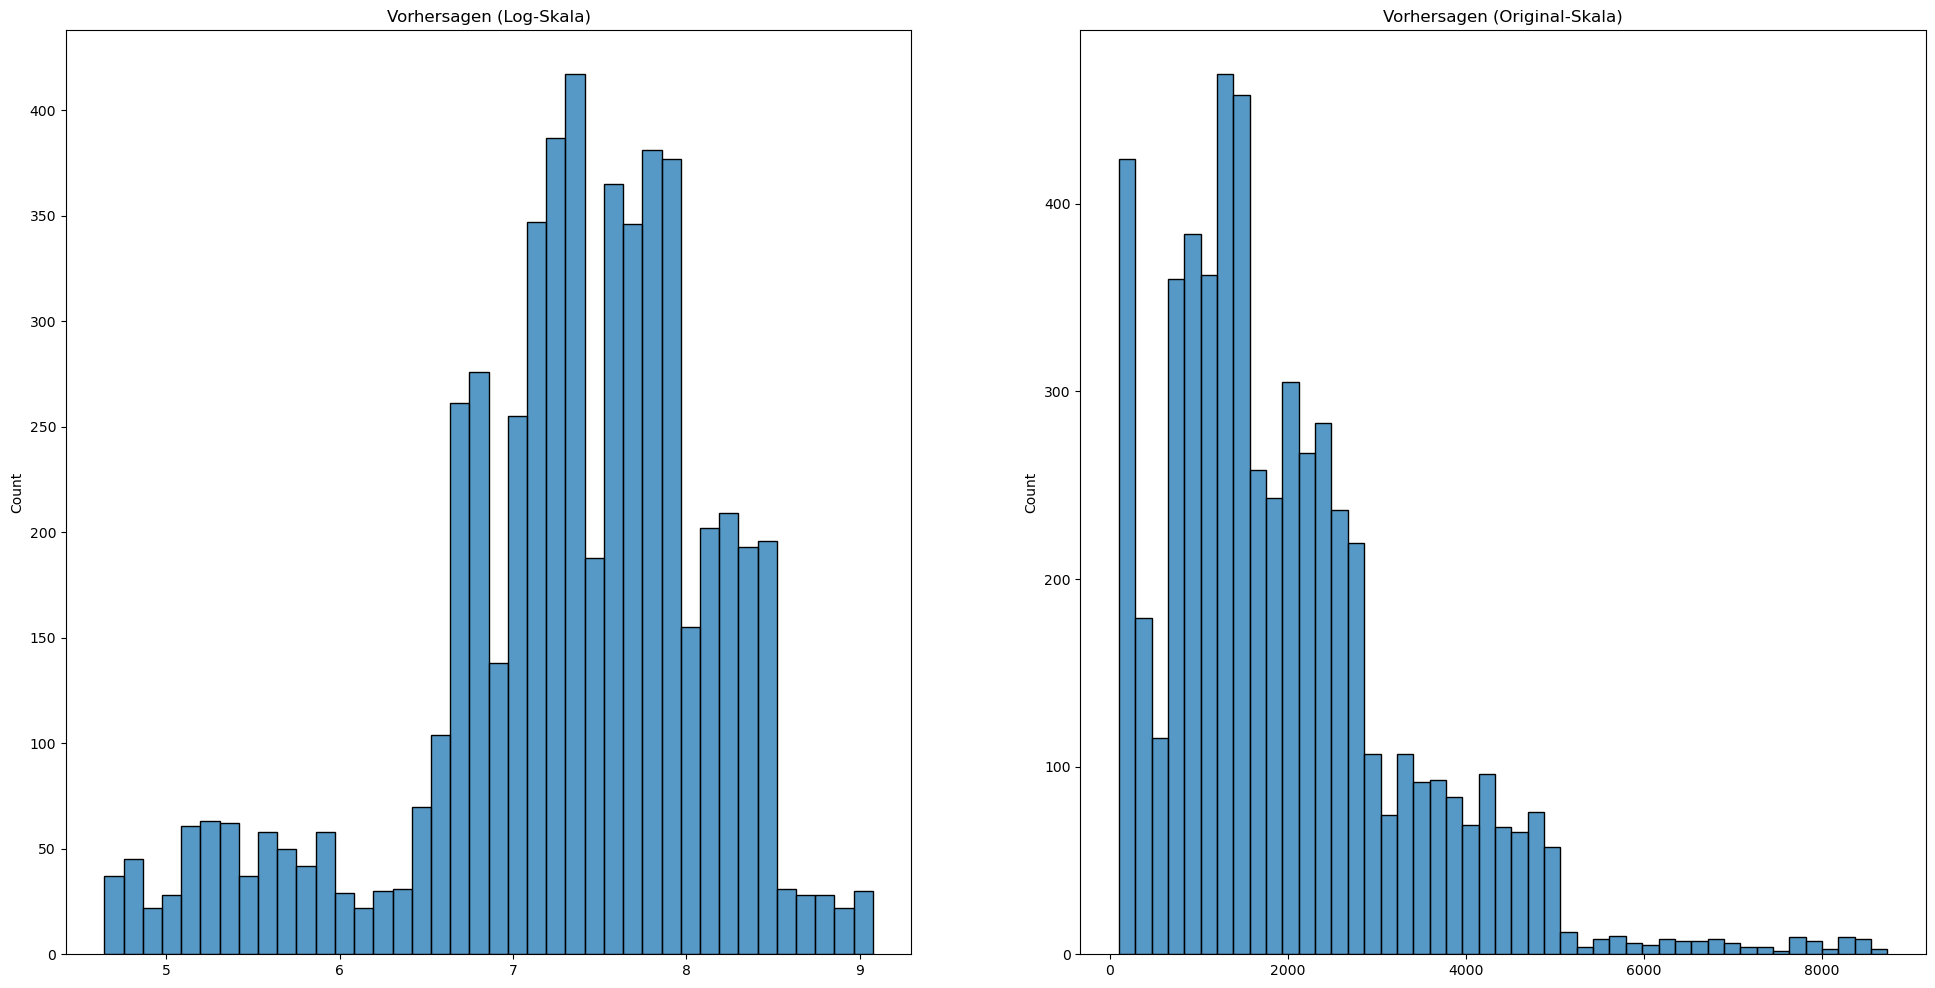

In [191]:
fig, ax = plt.subplots(1, 2, figsize = (24, 12))

sns.histplot(test_predictions, ax = ax[0])
ax[0].set_title('Vorhersagen (Log-Skala)')

sns.histplot(test_predictions_inverse_transformed, ax = ax[1])
ax[1].set_title('Vorhersagen (Original-Skala)')

plt.show()

## Fazit und Empfehlungen

**Zusammenfassung des Vorgehens:**
- EDA durchgeführt: Univariate und bivariate Analyse aller Variablen
- Fehlende Werte behandelt unter Berücksichtigung der Beziehungen zwischen Variablen
- Modellbildung mit allen Features gestartet
- Multikollinearität entfernt und insignifikante Features basierend auf p-Werten entfernt
- Annahmen der linearen Regression überprüft und das Modell iterativ verbessert
- Modell mit verschiedenen Evaluationsmetriken bewertet

**Finale Modellgleichung:**

$\log ($ Item\_Outlet\_Sales $)$ $= 4.6356 + 1.9555 \cdot$ Item\_MRP$ + 0.0158 \cdot$ Item\_Fat\_Content\_Regular $ + 1.9550 \cdot$ Outlet\_Type\_Supermarket Type1 $ + 1.7737 \cdot$ Outlet\_Type\_Supermarket Type2$ + 2.4837 \cdot$ Outlet\_Type\_Supermarket Type3

**Interpretation:**
- Mit jeder Einheitsänderung der Variable **Item_MRP** steigt der Log des **Item_Outlet_Sales** um 1.9555 Einheiten. Um den Umsatz zu steigern, sollten höherpreisige Artikel in gut sichtbaren Bereichen platziert werden.
- Im Durchschnitt sind die Log-Umsätze von Geschäften des Typs Supermarket Type 3 etwa 1.4-mal (2.4837/1.7737) so hoch wie bei Typ 2 und 1.27-mal (2.4837/1.9550) so hoch wie bei Typ 1.

**Empfehlungen:**
- Grosse Geschaefte vom Typ Supermarket Type 3 haben die hoechsten Umsaetze. Diese Umsätze sollten gehalten oder verbessert werden.
- Für andere Geschäftstypen sollten Strategien zur Umsatzsteigerung entwickelt werden, z.B. besserer Kundenservice, bessere Schulung des Personals, höhere Sichtbarkeit von Premium-Produkten.